In [ ]:
# basic_datasets.py
# Gerry Angelatos

# Below we define functions to generate data for a pair of basic classification tasks:
# n-dimensional radius (n-spheres) and 2-d spirals

import numpy as np
import scipy as sp


# Circles or N-spheres Dataset
def nsphere_sample(Ns, ndim=2):
    """
    Draw Ns random samples uniformly distributed on the surface of a unit n-sphere
    multiply by R to have samples on surface of radius R
    Parameters
    -----------
    Ns
        number of random points on surface of n-sphere
    ndim
        dimension of nsphere
    Returns
    ----------
    np.array
       (ndim x Ns) array of uniform samples on sphere surface

    """
    vec = np.random.randn(ndim, Ns)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

def Noisy_nsphere_sample(dr, Ns, ndim=2):
    """
    Draw Ns random samples on the surface of n-spheres with radii
    uniformly distributed within dr
    multiply by R to have samples between R-dr*R <r < R+dr*R
    Parameters
    -----------
    dr
        relative variation in radius 1-dr <r< 1+dr
    Ns
        number of random points on surface of n-sphere
    ndim
        dimension of nsphere
    Returns
    ----------
    np.array
       (ndim x Ns) array of uniform samples over spheres
       with radii uniform distributed 1-dr <r< 1+dr

    """
    return nsphere_sample(int(Ns), ndim) * (1+dr-2*dr*np.random.rand(int(Ns)))


# spirals dataset

def Spiral_sample2(dW, Ns, ts = 0, Nturns = 3, Sep = 0.05, seed=100):
    """
    Generates sample of a 2d spiral with N turns and standard deviation dw
    This version '2' adds noise normal to the spiral line (ie radial white noise)
    and normalizes the dataset relative so the noise free set is in [-1, 1]x2
    Parameters
    -----------
    dW
        width of spiral arms (noise strength),
        scales with the number of turns, so strength of 1
        gives about ~90% probability of falling in the correct arm
    Ns
        number of uniformly distributed points in spiral
    ts
        starting point (radians) relative to y-axis
    Nturns
        number of turns (radians/pi)
    Sep
        starting displacement from origin
    seed
        random seed so dataset is repeateable
    Returns
    ----------
    np.array
       (2 x Ns) array of uniform samples over spiral length,
       normally distributed at specific angle
    """
    rs = np.random.RandomState(seed = seed + int(ts*100) )
    theta = np.sqrt(rs.rand(Ns)) * Nturns * np.pi
    r = theta + np.pi*Sep
    spiral = np.array([(np.cos(ts)*np.cos(theta) - np.sin(ts)*np.sin(theta)) *r,
                      (np.sin(ts)*np.cos(theta) + np.cos(ts)*np.sin(theta) ) *r])
    Norm =  np.array([spiral[0]-spiral[1]/r, spiral[1]-spiral[0]/r]) # normal vector to each point
    return (spiral + (dW * Norm / np.sqrt(Norm[0]**2 + Norm[1]**2))* rs.randn(1, Ns) )/np.max(np.abs(spiral)) # add noise, normalize


def Spiral_line(Ns, ts = 0, Nturns = 3, Sep = 0.05):
    """
    Generates a 2d spiral with N turns
    Parameters
    -----------
    dW
        width of spiral arms (noise strength)
    Ns
        number of equally spaced points in spiral
    ts
        starting point (radians) relative to y-axis
    Nturns
        number of turns (radians/pi)
    Sep
        starting displacement from origin
    Returns
    ----------
    np.array
       (2 x Ns) array tracing out a spiral in the x-y plane from the origin

    """
    theta = np.linspace(0, 1, Ns) * Nturns * np.pi
    r = theta + np.pi*Sep
    spiral = np.array([(np.cos(ts)*np.cos(theta) - np.sin(ts)*np.sin(theta)) *r,
                      (np.sin(ts)*np.cos(theta) + np.cos(ts)*np.sin(theta) ) *r])
    return spiral



def Spiral_sample(dW, Ns, ts = 0, Nturns = 3, Sep = 0.05, seed=100):
    """
    Generates sample of a 2d spiral with N turns and standard deviation dw
    Parameters
    -----------
    dW
        width of spiral arms (noise strength)
    Ns
        number of uniformly distributed points in spiral
    ts
        starting point (radians) relative to y-axis
    Nturns
        number of turns (radians/pi)
    Sep
        starting displacement from origin
    seed
        random seed so dataset is repeateable
    Returns
    ----------
    np.array
       (2 x Ns) array of uniform samples over spiral length,
       normally distributed at specific angle


    """
    rs = np.random.RandomState(seed = seed + int(ts*100) )
    theta = np.sqrt(rs.rand(Ns)) * Nturns * np.pi
    r = theta + np.pi*Sep
    spiral = np.array([(np.cos(ts)*np.cos(theta) - np.sin(ts)*np.sin(theta)) *r,
                      (np.sin(ts)*np.cos(theta) + np.cos(ts)*np.sin(theta) ) *r])
    return spiral + rs.randn(2, Ns) * dW

In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=5ecb6b2abb5d2d1e88f072b5f1321830c53c50b1a0676b6d2435447deadf04d0
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [ ]:
# import necessary libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import sklearn
from sklearn import svm

# create simulator instances
backend_svec = AerSimulator(method='statevector')
backend_qasm = AerSimulator()

Quantum Kernel Method

Try also looking here: https://journals.aps.org/pra/pdf/10.1103/PhysRevA.107.032428

In [ ]:
# takes in ndim x N array
def eval_kernel_nsphere(data, val):
  print(data.shape)
  N = 1
  kernel = np.zeros((data.shape[1], data.shape[1]))
  cq = QuantumRegister(N, 'encoding_qubit')
  cb = ClassicalRegister(N, 'encoding_bit')

  init_circ = QuantumCircuit(cq, cb)

  kernel = np.zeros((data.shape[1], data.shape[1]))
  for i in range(data.shape[1]):
    kernel[i, i] = 1
    norm = np.linalg.norm(data[:, i].T)
    encoding_circ = QuantumCircuit(cq, cb)

    encoding_circ.ry(norm*np.pi*val, cq[0])

    for j in range(i+1, data.shape[1]):
      norm_prime = np.linalg.norm(data[:,j].T)
      encoding_circ_prime = QuantumCircuit(cq, cb)

      encoding_circ_prime.ry(-np.pi*norm_prime*val, cq[0])

      final_circ = init_circ.compose(encoding_circ)
      final_circ = final_circ.compose(encoding_circ_prime)

      for k in range(N):
        final_circ.measure(cq[k], cb[k])
      final_circ.draw('mpl')

      # measure a bunch to extract K(x', x) by getting prob outcome is 0^n
      transpiled_circuit = transpile(final_circ, backend_qasm)
      job = backend_qasm.run(transpiled_circuit, shots = 2**13)
      counts = job.result().get_counts()
      vals = list(counts.values())
      prob = vals[0]/np.sum(vals)

      kernel[i, j] = prob
      kernel[j, i] = prob

  return kernel

[[-1.11070825  1.01878289  0.10844301 -0.76851431 -1.16013261  0.53413656
   0.63689949  0.82081215  0.59220695 -0.98996834  0.67943895  0.88479087
   0.97373073 -0.28283072 -0.28362859 -0.93006952  1.08982634 -1.08191868
   0.88360838 -0.5356859  -0.65255791 -1.06443765  0.60720254  0.02560232
   0.74789361]
 [ 0.40071821 -0.45885793 -0.92100837  0.7127577   0.28965999  0.92442136
  -0.72119081 -0.03503408 -0.7300941   0.21328097  0.43486342  0.5902483
   0.19517407 -0.85652055 -0.82638948  0.55800883  0.19970104 -0.29266248
   0.22227836 -1.07354622  0.85531039  0.40008925 -0.5480541   0.84287111
   0.45528494]]
(2, 25)
(2, 25)
[[-0.41640491 -0.28859879  0.05805886 -0.3222689  -0.34407662 -0.15165676
   0.43151467  0.25762213  0.24500267  0.23990257  0.23586803  0.06740694
   0.38188497  0.09187468 -0.01340765 -0.26633431 -0.26488426 -0.27546848
  -0.12422748  0.30855035  0.48155352  0.40894913 -0.30167229 -0.53392329
  -0.10114546 -0.92576353  0.84914472  0.09038609 -0.64054852 -0.9

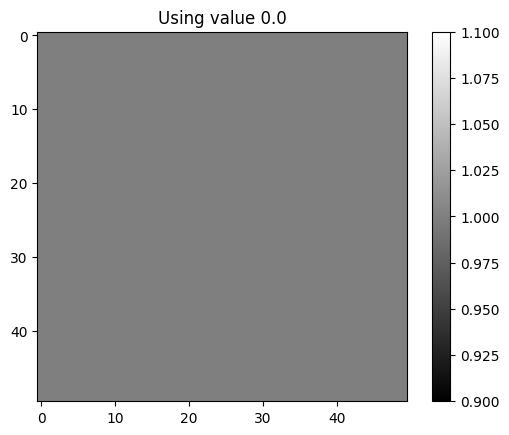

(2, 50)


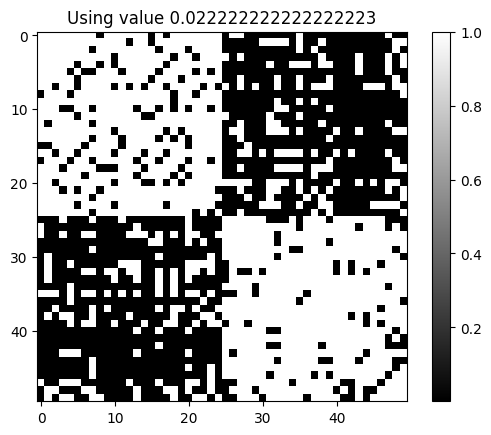

(2, 50)


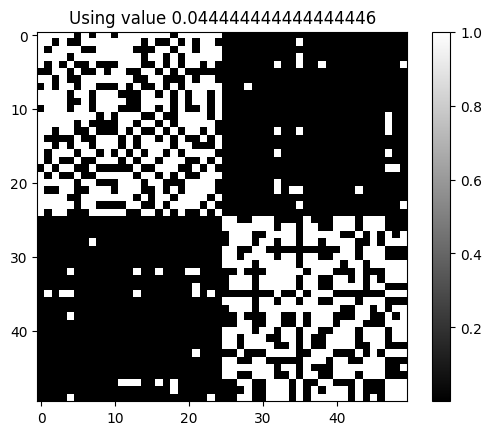

(2, 50)


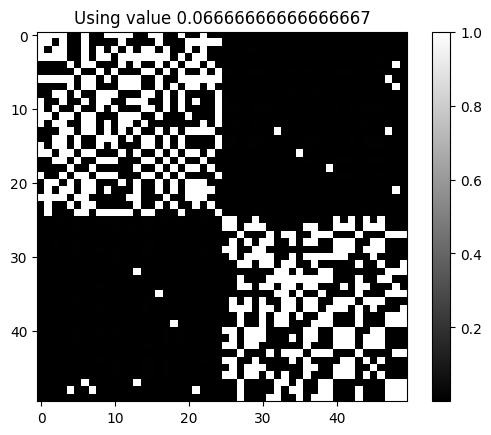

(2, 50)


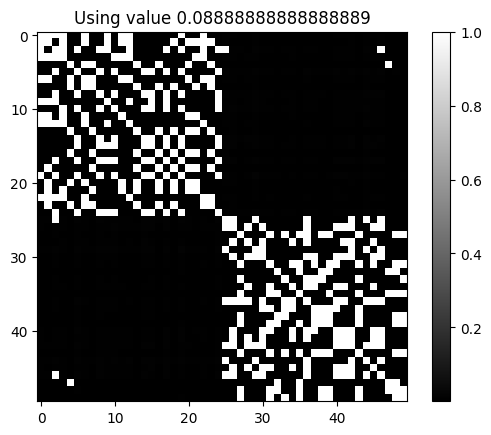

(2, 50)


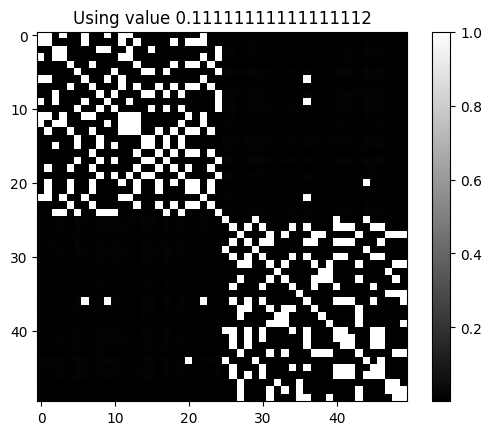

(2, 50)


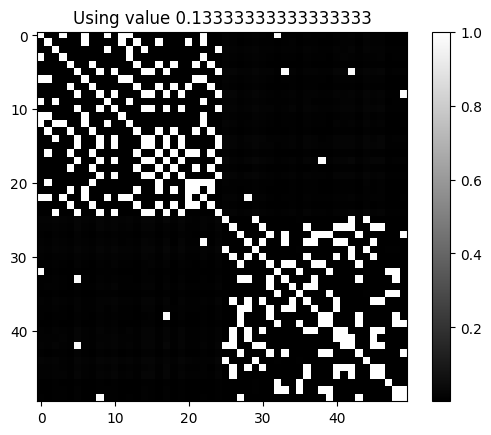

(2, 50)


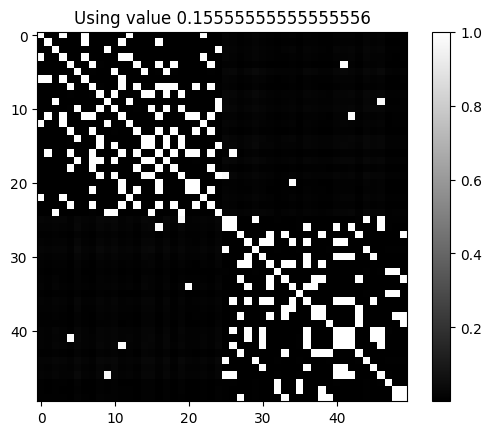

(2, 50)


KeyboardInterrupt: 

In [ ]:
D_circle = 2 # number of dimensions
N_circle = 50 # number of total datapoints
r1, r0 = 1, 0.5 # circle radii, r1>r0
dr = 0.2 # fluctuation in circle radii
r_mid =(r1+r0)/2 # dividing boundary

# generate input set from each class
x_circle1 =  r1*Noisy_nsphere_sample(dr/r1, int(N_circle/2), ndim=D_circle)
x_circle0 =  r0*Noisy_nsphere_sample(dr/r0, int(N_circle/2), ndim=D_circle)
print(x_circle1)

print(x_circle0.shape)
print(x_circle1.shape)
data = np.concatenate((x_circle0, x_circle1), axis = 1)
mag = np.sqrt(data[0]**2 + data[1]**2)
data /= np.max(mag)
print(data)
vals = np.linspace(0, 0.2, 10)

for value in vals:
  kernel = eval_kernel_nsphere(data, value)
  fig, ax = plt.subplots()
  plt.imshow(kernel, cmap = 'grey', interpolation = 'nearest')
  plt.colorbar()
  plt.title(f"Using value {value}")
  plt.show()

In [ ]:
def svm_from_qk(kernel_matrix, labels):
  # use precomputed Gram matrix from quantum method
  clf = svm.SVC(kernel = 'precomputed')
  clf.fit(kernel_matrix, labels)
  return clf

In [ ]:
D_circle = 2 # number of dimensions
N_circle = 200 # number of total datapoints
N_training = 50
r1, r0 = 1, 0.5 # circle radii, r1>r0
dr = 0.2 # fluctuation in circle radii
r_mid =(r1+r0)/2 # dividing boundary

# generate input set from each class
x_circle1 =  r1*Noisy_nsphere_sample(dr/r1, int(N_circle/2), ndim=D_circle)
x_circle0 =  r0*Noisy_nsphere_sample(dr/r0, int(N_circle/2), ndim=D_circle)
data = np.concatenate((x_circle0, x_circle1), axis = 1)
mag = np.sqrt(data[0]**2 + data[1]**2)
data /= np.max(mag)

training_data = np.concatenate((data[:, :int(N_training/2)],
                                data[:, int(N_circle/2):int(N_circle/2)+int(N_training/2)]), axis = 1)
test_data = np.concatenate((data[:, int(N_training/2):int(N_circle/2)], data[:, int(N_circle/2)+int(N_training/2):]), axis = 1)
Y_nsphere = np.ones((int(N_training/2)))
Y_nsphere = np.append(Y_nsphere, np.zeros((int(N_training/2))))
print(Y_nsphere.shape)
print(training_data.shape)

n_sphere_kernel = eval_kernel_nsphere(data, 0.03)

(50,)
(2, 50)
(2, 200)


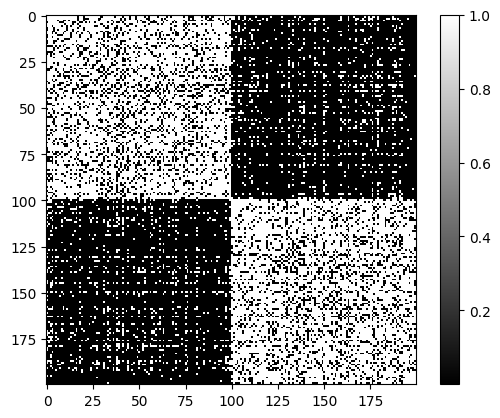

Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 

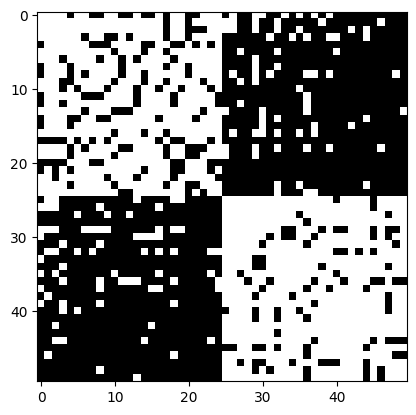

In [ ]:
N_test = N_circle-N_training

plt.imshow(n_sphere_kernel, cmap = 'grey', interpolation = 'nearest')
plt.colorbar()
plt.show()
n_sphere_kernel_train = n_sphere_kernel[:int(N_training/2), :int(N_training/2)]
n_sphere_kernel_train = np.vstack((n_sphere_kernel_train,
                                  n_sphere_kernel[int(N_circle/2):int(N_circle/2)+int(N_training/2), :int(N_training/2)]))

temp = n_sphere_kernel[:int(N_training/2), int(N_circle/2):int(N_circle/2)+int(N_training/2)]
temp = np.vstack((temp,
                 n_sphere_kernel[int(N_circle/2):int(N_circle/2)+int(N_training/2), int(N_circle/2):int(N_circle/2)+int(N_training/2)]))
n_sphere_kernel_train = np.hstack((n_sphere_kernel_train, temp))
plt.imshow(n_sphere_kernel_train, cmap = 'grey', interpolation = 'nearest')

n_sphere_kernel_test = n_sphere_kernel[:int(N_training/2), int(N_training/2):int(N_circle/2)]
n_sphere_kernel_test = np.vstack((n_sphere_kernel_test, n_sphere_kernel[:int(N_training/2), int(N_circle/2)+int(N_training/2):]))
temp = n_sphere_kernel[int(N_circle/2):int(N_circle/2)+int(N_training/2), int(N_training/2):int(N_circle/2)]
temp = np.vstack((temp, n_sphere_kernel[int(N_circle/2):int(N_circle/2)+int(N_training/2), int(N_circle/2)+int(N_training/2):]))
n_sphere_kernel_test = np.hstack((n_sphere_kernel_test, temp))

Y_nsphere = np.zeros(int(N_training/2))
Y_nsphere = np.append(Y_nsphere, np.ones(int(N_training/2)))

test_labels = np.zeros(int(N_test/2))
test_labels = np.append(test_labels, np.ones(int(N_test/2)))

n_sphere_svm = svm_from_qk(n_sphere_kernel_train, Y_nsphere)
predictions = n_sphere_svm.predict(n_sphere_kernel_test.T)
accuracy = 0
for i in range(predictions.shape[0]):
  print(f"Predicted label was {predictions[i]} and actual label was {test_labels[i]}")
  if (predictions[i] == test_labels[i]):
    accuracy += 1

print(f"Final accuracy was {accuracy/predictions.shape[0]}")

Parameterized Circuit Learning (explicit?)

In [ ]:
# sorry for inconsistency but data here should be (Nvals x Ndim)
# iterations is number of times the variational circuit is run
# c is small hyperparameter for estimating gradient
# uses mean squared error loss function
# uses SPSA to estimate the gradient
# returns optimized variational parameter θ
def train_vqa(training_data, labels, init_theta, iterations, c, learning_rate, threshold):
  N_pts = training_data.shape[0]
  if (len(training_data.shape) == 1):
    N = 1
  else:
    N = training_data.shape[1]
  print(N)
  print(N_pts)
  print(labels.shape)
  theta = init_theta

  cq = QuantumRegister(2*N, 'encoding_qubit')
  cb = ClassicalRegister(2*N, 'encoding_bit')
  init_circ = QuantumCircuit(cq, cb)

  gradient_norm = np.inf
  iter = 0


  # training
  while (gradient_norm >= threshold):
    print("-----------------------------")
    print(f"Iteration number {iter}")
    print(f"Current theta is {theta}")
    accuracy = 0
    perturbation = np.random.rand(theta.shape[0])
    loss_fn_pos = 0
    loss_fn_neg = 0
    for i in range(N_pts):
      # encoding circuit
      if (N ==1):
        classical_data = training_data[i]
      else:
        classical_data = training_data[i, :]
      encoding_circ = QuantumCircuit(cq, cb)

      if (N==1):
        encoding_circ.ry(2*np.pi*classical_data, cq[0])
        encoding_circ.ry(2*np.pi*classical_data, cq[1])
      else:
        for j in range(N):
          encoding_circ.ry(2*np.pi*classical_data[j], cq[j])
          encoding_circ.ry(2*np.pi*classical_data[j], cq[N+j])
        for j in range(N-1):
          encoding_circ.cx(cq[j], cq[j+1])
          encoding_circ.ry(2*np.pi*(classical_data[j]*classical_data[j+1]), cq[j])

          encoding_circ.cx(cq[N+j], cq[N+j+1])
          encoding_circ.ry(2*np.pi*(classical_data[j]*classical_data[j+1]), cq[N+j])

      var_circ = QuantumCircuit(cq, cb)

      # variational circuit

      for j in range(N):
        var_circ.ry(2*(theta[j]+c*perturbation[j]), cq[j])
        var_circ.ry(2*(theta[j]-c*perturbation[j]), cq[N+j])

      for j in range(N-1):
        var_circ.cx(cq[j], cq[j+1])
        var_circ.cx(cq[N+j], cq[N+j+1])

      # construct final circuit
      final_circ = init_circ.compose(encoding_circ)

      # apply var circuit some number of iterations
      for j in range(iterations):
        final_circ = final_circ.compose(var_circ)

      # measure first qubit/Nth qubit
      for j in range(2*N):
        final_circ.measure(cq[j], cb[j])

      # simulate circuit
      transpiled_circuit = transpile(final_circ, backend_qasm)
      job = backend_qasm.run(transpiled_circuit, shots = 2**13)
      counts = job.result().get_counts()
      keys = list(counts.keys())
      vals = list(counts.values())

      predicted_label_pos = 0
      predicted_label_neg = 0

      # label is predicted probabilty of outcome 0
      for j in range(len(keys)):
        if (int(keys[j][0:1]) == 0):
          predicted_label_pos += vals[j]
        if (int(keys[j][N:N+1]) == 0):
          predicted_label_neg += vals[j]

      predicted_label_pos /= np.sum(vals)
      predicted_label_neg /= np.sum(vals)

      predicted_label_pos = 1 - predicted_label_pos
      predicted_label_neg = 1 - predicted_label_neg

      print(f"Point {i} has predicted plus label {predicted_label_pos} and actual label {labels[i]}")
      print(f"Point {i} has predicted minus label {predicted_label_neg} and actual label {labels[i]}")
      if (predicted_label_pos >= 0.5 and labels[i] ==1):
        accuracy += 1
      if (predicted_label_pos <= 0.5 and labels[i] ==0):
        accuracy += 1

      loss_fn_pos += (predicted_label_pos - labels[i])**2
      loss_fn_neg += (predicted_label_neg - labels[i])**2

    loss_fn_pos /= N_pts
    loss_fn_neg /= N_pts
    print(f"Positive displacement loss function is {loss_fn_pos}")
    print(f"Negative displacement loss function is {loss_fn_neg}")

    # calculate gradient
    gradient = (loss_fn_pos - loss_fn_neg)/(2*c*perturbation)
    print(f"Gradient estimated to be {gradient}")
    print(f"Current model accuracy is {accuracy /(2*N_pts)}")
    # update theta
    theta = theta - learning_rate*gradient
    print(f"New theta is {theta}")
    gradient_norm = np.linalg.norm(gradient)
    iter +=1
    print("-----------------------------")

  return theta

# takes in data with dimensions Nvals x Ndim
def predict_vqa(data, theta, iterations):
  predicted_labels = np.zeros(data.shape[0])
  print(data.shape)
  if (len(data.shape) == 1):
    N = 1
  else:
    N = data.shape[1]
  print(N)
  cq = QuantumRegister(N, 'encoding_qubit')
  cb = ClassicalRegister(N, 'encoding_bit')
  init_circ = QuantumCircuit(cq, cb)

  # variational circuit with optimized theta
  var_circ = QuantumCircuit(cq, cb)

  # variational circuit
  for j in range(N):
    var_circ.ry(2*(theta[j]), cq[j])
  for j in range(N-1):
    var_circ.cx(cq[j], cq[j+1])

  for i in range(data.shape[0]):
  # encoding circuit
    if (N==1):
      classical_data = data[i]
    else:
      classical_data = data[i, :]
    encoding_circ = QuantumCircuit(cq, cb)

    if (N==1):
      encoding_circ.ry(2*np.pi*(classical_data), cq[0])
    else:
      for j in range(N):
        encoding_circ.ry(2*np.pi*(classical_data[j]), cq[j])

      for j in range(N-1):
        encoding_circ.cx(cq[j], cq[j+1])
        encoding_circ.ry(2*np.arccos(classical_data[j]*classical_data[j+1]), cq[j])

    final_circ = init_circ.compose(encoding_circ)
    for j in range(iterations):
      final_circ = final_circ.compose(var_circ)

    for j in range(N):
      final_circ.measure(cq[j], cb[j])

    transpiled_circuit = transpile(final_circ, backend_qasm)
    job = backend_qasm.run(transpiled_circuit, shots = 2**13)
    counts = job.result().get_counts()
    keys = list(counts.keys())
    vals = list(counts.values())

    predicted_label= 0

    # label is predicted probabilty of outcome 0
    for j in range(len(keys)):
      if (int(keys[j][0:1]) == 0):
        predicted_label += vals[j]

    predicted_label /= np.sum(vals)
    if (predicted_label <= 0.5):
      predicted_labels[i] = 1
    else:
      predicted_labels[i] = 0
  return predicted_labels



[[-1.07705774  0.67015918 -0.46367894  0.06715775 -0.56291684  0.06923089
   0.18199493 -0.99165379 -1.06091978 -0.06274463 -0.48962297  0.7870181
  -0.00618562 -0.08738004  0.22647642  0.97978786  1.02106551 -0.13787097
  -1.14181009  0.38428591  1.17882478  0.75170591 -0.23073965  0.738849
   0.80320224 -0.4021381  -0.30284158 -0.66929839 -1.02555738  0.54349527
  -0.80521336 -0.22110656 -1.11342186  0.03651228  0.9774874  -1.09007466
   0.56069156  0.78215354 -0.21414868 -0.45130838 -0.78411599  1.08973651
  -0.24318522 -0.09481037 -0.24284626 -1.01984869 -0.04661498  1.1234748
   0.93538823  0.16291537 -0.89724023  0.15224555  0.87931765 -1.08030455
   0.72806883  0.1553491   0.26381204 -1.17397908  0.53379425  0.62981633
   0.18017332  0.51708604 -0.86171002  0.98293199 -1.08347497 -0.15360121
   0.30354413 -0.01331314 -0.66576168  0.875514   -0.7866565  -0.55023561
   0.9568275   0.56611108 -0.76620927  0.49224655 -0.70767108 -0.19830963
   0.30161781 -0.35970381 -0.05258738  1.0

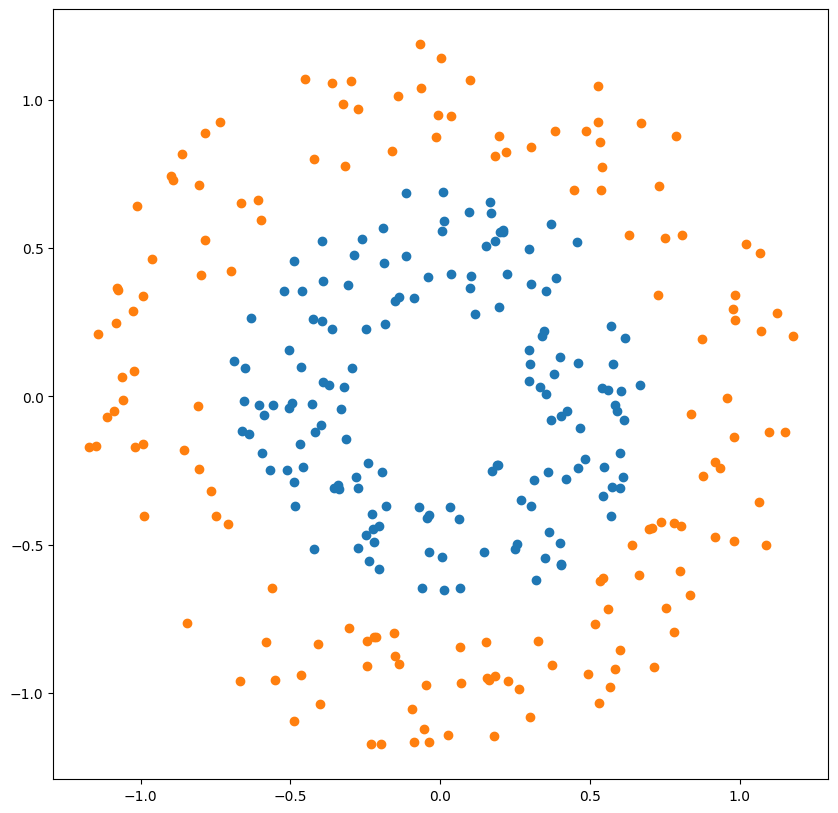

Streaming output truncated to the last 5000 lines.
Point 6 has predicted minus label 0.830322265625 and actual label 0.0
Point 7 has predicted plus label 0.4351806640625 and actual label 0.0
Point 7 has predicted minus label 0.488525390625 and actual label 0.0
Point 8 has predicted plus label 0.9630126953125 and actual label 0.0
Point 8 has predicted minus label 0.923828125 and actual label 0.0
Point 9 has predicted plus label 0.212890625 and actual label 0.0
Point 9 has predicted minus label 0.1856689453125 and actual label 0.0
Point 10 has predicted plus label 0.1455078125 and actual label 0.0
Point 10 has predicted minus label 0.3052978515625 and actual label 0.0
Point 11 has predicted plus label 0.25341796875 and actual label 0.0
Point 11 has predicted minus label 0.2589111328125 and actual label 0.0
Point 12 has predicted plus label 0.45263671875 and actual label 0.0
Point 12 has predicted minus label 0.5491943359375 and actual label 0.0
Point 13 has predicted plus label 0.9628906

In [ ]:
D_circle = 2 # number of dimensions, can change to be 5
N_circle = 300 # number of total datapoints
r1, r0 = 1, 0.5 # circle radii, r1>r0
dr = 0.2 # fluctuation in circle radii
r_mid =(r1+r0)/2 # dividing boundary
N_training = 100
N_test = N_circle-N_training

# generate input set from each class
x_circle1 =  r1*Noisy_nsphere_sample(dr/r1, int(N_circle/2), ndim=D_circle)
x_circle0 =  r0*Noisy_nsphere_sample(dr/r0, int(N_circle/2), ndim=D_circle)
print(x_circle1)

plt.figure(figsize = (10, 10))
plt.scatter(x_circle0[0], x_circle0[1])
plt.scatter(x_circle1[0], x_circle1[1])
plt.show()

# generate entire array and scale by largest magnitude point so everything is at most 1
print(x_circle0.shape)
print(x_circle1.shape)
data = np.concatenate((x_circle0, x_circle1), axis = 1)
mag = np.sqrt(data[0]**2 + data[1]**2)
data /= np.max(mag)
data = data.T
print(data.shape)

# isolate training data
training_data = np.vstack((data[:int(N_training/2), :], data[int(N_circle/2):int(N_circle/2)+int(N_training/2), :]))
print(training_data.shape)
# isolate test data
test_data = np.vstack((data[int(N_training/2):int(N_circle/2), :], data[int(N_circle/2)+int(N_training/2):, :]))

# generate labels
Y_nsphere_training = np.zeros((int(N_training/2)))
ones = np.ones((int(N_training/2)))
training_labels = np.concatenate((Y_nsphere_training, ones))

Y_nsphere_test = np.zeros((int(N_test/2)))
test_labels = np.concatenate((Y_nsphere_test, np.ones((int(N_test/2)))))

# use 3 iterations of the variational circuit, c of 0.001, learning rate of 0.01,
# and threshold of 0.02 for convergence
final_params = train_vqa(training_data, training_labels, np.random.rand(2), 3, 0.05, 0.01, 0.02)


In [ ]:
predicted_labels = predict_vqa(test_data, final_params, 3)
accuracy = 0
for i in range(predicted_labels.shape[0]):
  print(f"Predicted label was {predicted_labels[i]} and actual label was {test_labels[i]}")
  if (predicted_labels[i] == test_labels[i]):
    accuracy += 1

print(accuracy/predicted_labels.shape[0])

(200, 2)
2
Predicted label was 1.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 1.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 1.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 1.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 1.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 1.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 1.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 1.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 1.0 and actual label was 0.0
Predicted

[[ 8.40305862e-01  1.08681161e-03  8.64359149e-01 -6.99351452e-01
  -7.86272728e-01  7.89114088e-01  4.78279866e-01  1.01940050e-02
  -5.68829282e-01 -4.81162821e-01  1.01040097e+00 -4.90931884e-01
   3.23958688e-01 -1.19058820e+00 -7.49345644e-02 -8.10168958e-01
   1.00182112e+00 -7.73736635e-01 -1.06836588e+00  2.26848912e-01
  -7.98695232e-01  1.16018020e+00  7.54192339e-01 -6.45311956e-01
   2.63536396e-02  4.41951779e-01 -4.32160577e-01  4.21765992e-01
   9.73633160e-01  5.55878345e-01  3.99389512e-01  8.92590994e-01
  -1.09902647e+00  6.58126389e-01 -9.87373320e-01  1.04366877e+00
  -7.97219345e-01 -3.34533670e-01 -3.87078036e-01  3.70524561e-01
   9.51574818e-01 -9.54098189e-01  5.50178731e-01 -7.48597779e-01
  -9.79798159e-01  5.27540066e-01  1.35913855e-01 -9.95147955e-01
   9.08175679e-01  7.94833633e-01 -6.39057630e-01 -1.14450444e+00
  -4.82449744e-01 -1.63084682e-01  3.67958575e-01 -9.73789205e-01
   4.99007056e-01  1.65049299e-01 -8.41743245e-01 -7.34821235e-01
   3.85629

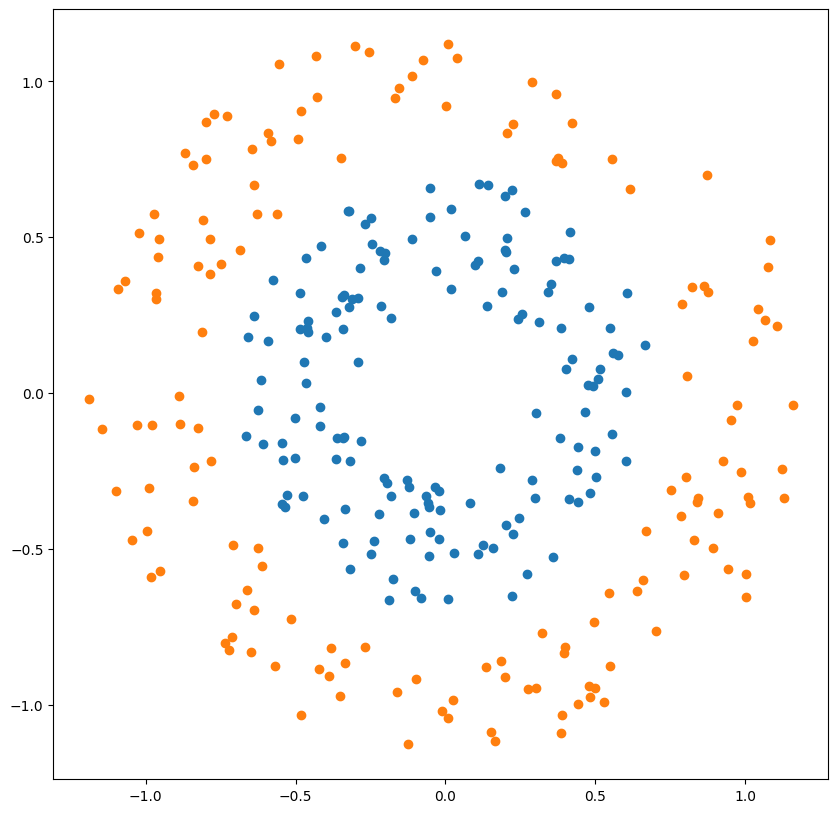

(2, 150)
(2, 150)
(300,)
(100,)
1
100
(100,)
-----------------------------
Iteration number 0
Current theta is [0.67965304]
Point 0 has predicted plus label 0.8865966796875 and actual label 0.0
Point 0 has predicted minus label 0.80810546875 and actual label 0.0
Point 1 has predicted plus label 0.9605712890625 and actual label 0.0
Point 1 has predicted minus label 0.9141845703125 and actual label 0.0
Point 2 has predicted plus label 0.9541015625 and actual label 0.0
Point 2 has predicted minus label 0.9014892578125 and actual label 0.0
Point 3 has predicted plus label 0.99951171875 and actual label 0.0
Point 3 has predicted minus label 0.99267578125 and actual label 0.0
Point 4 has predicted plus label 0.9927978515625 and actual label 0.0
Point 4 has predicted minus label 0.96826171875 and actual label 0.0
Point 5 has predicted plus label 0.9677734375 and actual label 0.0
Point 5 has predicted minus label 0.925048828125 and actual label 0.0
Point 6 has predicted plus label 0.8856201171

In [ ]:
D_circle = 2 # number of dimensions, can change to be 5
N_circle = 300 # number of total datapoints
r1, r0 = 1, 0.5 # circle radii, r1>r0
dr = 0.2 # fluctuation in circle radii
r_mid =(r1+r0)/2 # dividing boundary
N_training = 100
N_test = N_circle-N_training

# generate input set from each class
x_circle1 =  r1*Noisy_nsphere_sample(dr/r1, int(N_circle/2), ndim=D_circle)
x_circle0 =  r0*Noisy_nsphere_sample(dr/r0, int(N_circle/2), ndim=D_circle)
print(x_circle1)

plt.figure(figsize = (10, 10))
plt.scatter(x_circle0[0], x_circle0[1])
plt.scatter(x_circle1[0], x_circle1[1])
plt.show()

# generate entire array and scale by largest magnitude point so everything is at most 1
print(x_circle0.shape)
print(x_circle1.shape)
data = np.concatenate((x_circle0, x_circle1), axis = 1)
mag = np.sqrt(data[0]**2 + data[1]**2)
data = mag/np.max(mag)
print(data.shape)

# isolate training data
training_data = np.concatenate((data[:int(N_training/2)], data[int(N_circle/2):int(N_circle/2)+int(N_training/2)]))
print(training_data.shape)
# generate labels
Y_nsphere_training = np.zeros((int(N_training/2)))
ones = np.ones((int(N_training/2)))
training_labels = np.concatenate((Y_nsphere_training, ones))

Y_nsphere_test = np.zeros((int(N_test/2)))
test_labels = np.concatenate((Y_nsphere_test, np.ones((int(N_test/2)))))

# use 3 iterations of the variational circuit, c of 0.001, learning rate of 0.01,
# and threshold of 0.02 for convergence
final_params = train_vqa(training_data, training_labels, np.random.rand(1), 3, 0.05, 0.01, 0.02)


In [ ]:
# testing for norm only method
test_data = np.concatenate((data[int(N_training/2):int(N_circle/2)], data[int(N_circle/2)+int(N_training/2):]))

print(final_params)
predicted_labels = predict_vqa(test_data, final_params, 3)
accuracy = 0
for i in range(predicted_labels.shape[0]):
  print(f"Predicted label was {predicted_labels[i]} and actual label was {test_labels[i]}")
  if (predicted_labels[i] == test_labels[i]):
    accuracy += 1

print(accuracy/predicted_labels.shape[0])

[0.65228714]
(200,)
1
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.0
Predicted label was 0.0 and actual label was 0.

Classical SVM/Feed Forward

In [ ]:
# classical svm

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import time
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=10.0, gamma="scale"))
])
start = time.perf_counter()
svm_model.fit(X_train, y_train)
svm_train_time = time.perf_counter() - start

start = time.perf_counter()
y_pred_svm = svm_model.predict(X_test)
svm_test_time = time.perf_counter() - start

svm_acc = accuracy_score(y_test, y_pred_svm)

print("SVM RESULTS")
print("-----------")
print(f"Training time   : {svm_train_time:.4f} s")
print(f"Testing time  : {svm_test_time:.4f} s")
print(f"Test accuracy   : {svm_acc:.3f}")
print(f"# Support vecs  : {svm_model.named_steps['svm'].n_support_}")



In [ ]:
# neural net
from sklearn.metrics import log_loss

# Build model
nn_model = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(64, 64),
        activation="relu",
        solver="adam",
        max_iter=2000,
        random_state=42
    ))
])

t0 = time.time()
nn_model.fit(X_train, y_train)
train_time_nn = time.time() - t0


t0 = time.time()
y_pred_nn = nn_model.predict(X_test)
infer_time_nn = time.time() - t0

nn_acc = accuracy_score(y_test, y_pred_nn)

y_prob = nn_model.predict_proba(X_test)
nn_loss = log_loss(y_test, y_prob)

mlp = nn_model.named_steps["mlp"]
n_params = sum(w.size for w in mlp.coefs_) + sum(b.size for b in mlp.intercepts_)


print("Neural Network Results")
print("-" * 40)
print(f"Training time        : {train_time_nn:.4f} s")
print(f"Testing time       : {infer_time_nn:.4f} s")
print(f"Inference / sample   : {infer_time_nn / len(X_test):.2e} s")
print(f"Accuracy             : {nn_acc:.4f}")
print(f"Log loss             : {nn_loss:.4f}")
print(f"Number of parameters : {n_params}")

